(I added an image so it doesn't let me provide the share link)
SUMMARY OF CHATGPT CONVERSATION:
1. Classification Decision Tree and Comparison with Linear Regression
We discussed what a Classification Decision Tree is, focusing on its role in solving classification problems where the target variable is categorical. Real-world applications include medical diagnosis and spam detection.
Compared a Classification Decision Tree with Multiple Linear Regression:
Decision Tree predicts classes/categories, while Linear Regression predicts continuous values.
2. Metrics: Accuracy, Sensitivity, Specificity, and Precision
Explained each metric with real-world applications:
Accuracy: Measures overall correctness; useful for balanced datasets.
Sensitivity: Focuses on identifying actual positives (important in medical diagnostics).
Specificity: Emphasizes identifying actual negatives (useful in rare disease screening).
Precision: Focuses on minimizing false positives (e.g., spam email filters).
3. Amazon Books Dataset EDA and Classification
Preprocessed the dataset:
Removed unnecessary columns (Weight_oz, Width, Height) and rows with NaN.
Converted relevant columns to correct types (int or category).
Trained a DecisionTreeClassifier (clf) using List Price as the sole predictor.
4. Extending the Classification Model
Enhanced the feature set to include NumPages, Thick, and List Price.
Trained a new classifier (clf2) with max_depth=4 and visualized the decision tree.
Explained how predictions are made by following the splits in the tree.
5. Evaluating Models with Confusion Matrices
Computed confusion matrices for both models (clf and clf2), calculating sensitivity, specificity, and accuracy:
clf performed less effectively due to reliance on only one feature (List Price).
clf2 showed improved metrics due to the inclusion of additional features.
6. Visualization of Confusion Matrices
Provided heatmaps of confusion matrices for both models using seaborn to illustrate performance.
Explained how to interpret the matrices and highlighted the improvements in clf2.
7. Causes of Performance Differences
The difference in performance between clf and clf2 was attributed to the expanded feature set in clf2, which allowed the model to better separate the classes (Paperback vs. Hardcover).
Concluded that incorporating more relevant features improves model performance by reducing false positives and false negatives.

QUESTION 2:
Accuracy: An example for when to measure accuracy is when the real world difference between a false negative/false positive isn't too big. For example, if we want to predict whether students will pass or fail an exam, the effect of misclassifying a false positive/negative (i.e. misclassifying a fail or pass) doesn't really have any real world effects on the actual students, so here it's worth looking at how accurate we are in our predictions.

Sensitivity: An example of this is predicting cancer, as if we mark a positive screening of cancer as benign/negative, then this has significant real world implications as it puts that individual at a much higher risk/much lower overall chance of survival

Specificity: An example of this is could be testing rare diseases, in particular one's with a high costs of treatment. Marking an individual as having such a disease when they don't can lead to things like unneccesary surgeries/medicines, cause of stress/worry, etc. While this does relate to sensitivity, this focuses more on the real world effects of false negatives rather than false positives. 

Precision: An example of this is prediciting what email is spam vs. what emails are actually spam. Perhaps we predict that out of 100 emails, 95 are spam, but what if 90 are spam, in this case its possible we miss important emails that could cause trouble down the line. In a situation like this, we want to measure our confidence in our positive results. This is similar to accuracy, but the main difference is that precision focuses solely on our positive results that were correct, rather than both positive and negative.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [2]:
ab

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,9.3,6.6,1.1,24.0
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,9.1,6.1,0.7,8.0
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,8.0,5.4,0.7,6.4
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,10.7,8.9,0.9,14.4


/tmp/ipykernel_70/1695118875.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_70/1695118875.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_70/1695118875.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

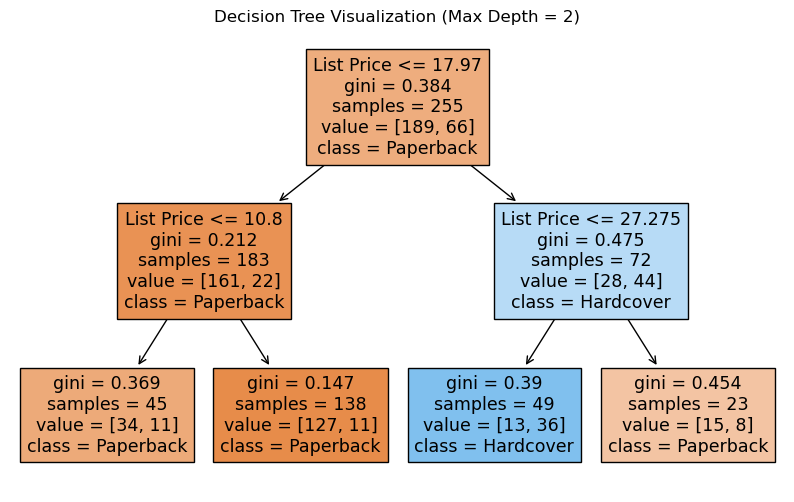

Training set observations: 255
Test set observations: 64
Accuracy of the model: 0.84
Predicted classes: [False, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, True, True, True, False, True, False, False, False, True, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, True, True]
Actual classes: [False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, False, False, False, True, True, True, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, True, False, False, False, True, False, False, False, False, True, True, True]


In [4]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 3: Preprocess the data
# Remove unnecessary columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Ensure columns have correct types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Step 4: Define features (X) and target (y)
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price
y = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']  # Target: 'H' for Hardcover

# Step 5: Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Step 7: Visualize the Decision Tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree Visualization (Max Depth = 2)")
plt.show()

# Step 8: Make predictions on the test set
y_pred = clf.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Training set observations: {len(X_train)}")
print(f"Test set observations: {len(X_test)}")
print(f"Accuracy of the model: {accuracy:.2f}")

# Optional: Print predictions for a closer look
print("Predicted classes:", y_pred.tolist())
print("Actual classes:", y_test.tolist())

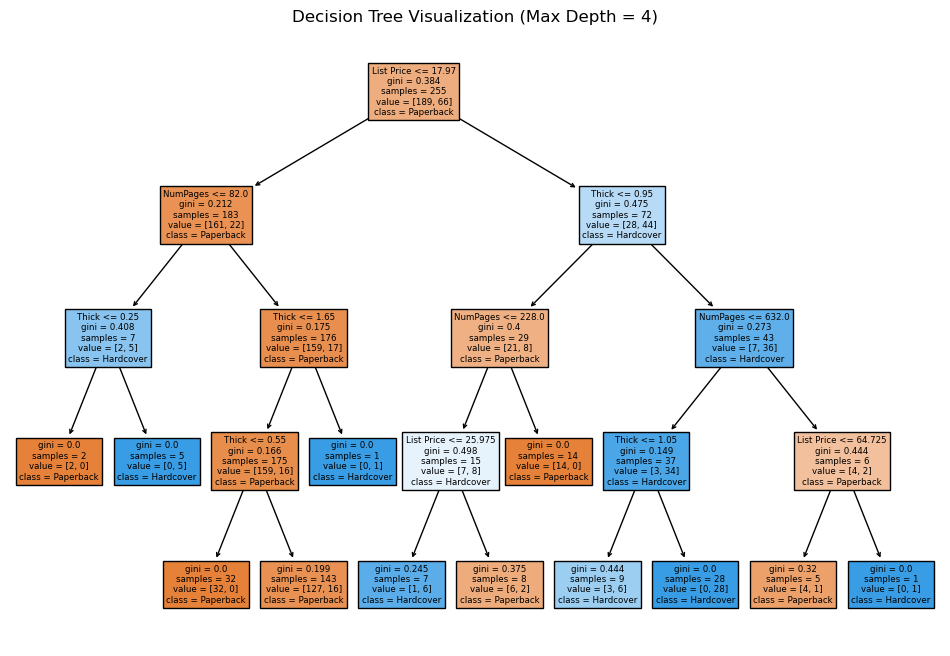

Training set observations: 255
Test set observations: 64
Accuracy of the new model: 0.86
Predicted classes: [False, False, True, True, True, True, False, False, False, False, False, False, True, False, False, False, True, False, True, False, True, False, False, False, True, True, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, True, False, True]
Actual classes: [False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, False, False, False, True, True, True, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, True, False, False, False, True, False, False, False, False, True, True, True]


In [5]:
# Step 1: Modify features (X) to include NumPages, Thick, and List Price
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # New feature set

# Step 2: Use the same train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a new DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Step 4: Visualize the new decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], filled=True)
plt.title("Decision Tree Visualization (Max Depth = 4)")
plt.show()

# Step 5: Make predictions on the test set
y_pred2 = clf2.predict(X_test)

# Step 6: Evaluate the new model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Training set observations: {len(X_train)}")
print(f"Test set observations: {len(X_test)}")
print(f"Accuracy of the new model: {accuracy2:.2f}")

# Optional: Print predictions for analysis
print("Predicted classes:", y_pred2.tolist())
print("Actual classes:", y_test.tolist())


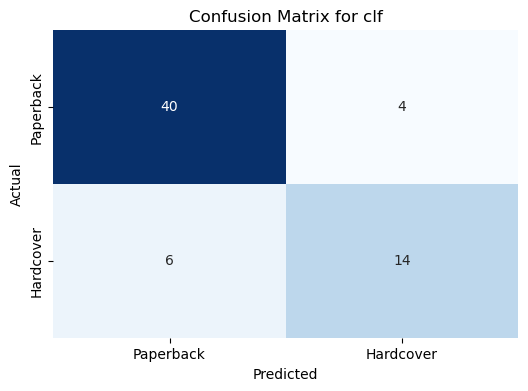

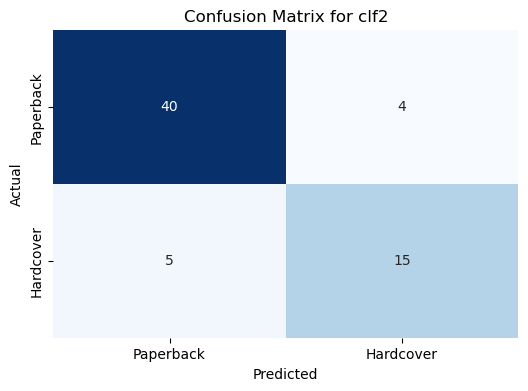

Metrics for clf:
Sensitivity: 0.700
Specificity: 0.909
Accuracy: 0.844

Metrics for clf2:
Sensitivity: 0.750
Specificity: 0.909
Accuracy: 0.859


In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives
    
    # Calculate metrics
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return cm, sensitivity, specificity, accuracy

# Visualize confusion matrix
def plot_confusion_matrix(cm, title="Confusion Matrix"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Paperback", "Hardcover"],
                yticklabels=["Paperback", "Hardcover"])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Calculate metrics for clf
cm_clf, sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(y_test, y_pred)
plot_confusion_matrix(cm_clf, title="Confusion Matrix for clf")

# Calculate metrics for clf2
cm_clf2, sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(y_test, y_pred2)
plot_confusion_matrix(cm_clf2, title="Confusion Matrix for clf2")

# Display metrics
print("Metrics for clf:")
print(f"Sensitivity: {sensitivity_clf:.3f}")
print(f"Specificity: {specificity_clf:.3f}")
print(f"Accuracy: {accuracy_clf:.3f}\n")

print("Metrics for clf2:")
print(f"Sensitivity: {sensitivity_clf2:.3f}")
print(f"Specificity: {specificity_clf2:.3f}")
print(f"Accuracy: {accuracy_clf2:.3f}")


The primary difference between the two pieces of code is hidden within the clf.predict piece of code. Observe that the first matrix has the following piece of code "clf.predict(ab_reduced_noNaN_train[['List Price']])" while the second matrix has the following code " clf.predict(ab_reduced_noNaN_train[['NumPages','Thick','List Price']])." From here it becomes very obvious as to what the difference is, the first matirx has 2 less variables its being trained on, which is why clf provides different results and moreover why clf2 is more accurate. 